# day 10 of Data science training
##cNN (CONVOLUTIONAL NEURAL NETWORK)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
(x_train , y_train), (x_test,y_test)= fashion_mnist.load_data()

In [16]:
x_train = x_train / 255
x_test = x_test /255

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [20]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size =(3,3), input_shape = x_train[0].shape   ))
model.add(MaxPool2D(pool_size = (2,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units = 757, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = "softmax"))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 8, 32)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 6, 64)         18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 960)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 960)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 757)              

In [22]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [23]:
trained_model = model.fit(x_train, y_train , verbose = 1, epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 78s 1ms/step - loss: 0.4530 - accuracy: 0.8346
Epoch 2/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.3164 - accuracy: 0.8838
Epoch 3/20
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2789 - accuracy: 0.8963
Epoch 4/20
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2574 - accuracy: 0.9042
Epoch 5/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.2329 - accuracy: 0.9133
Epoch 6/20
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2172 - accuracy: 0.91890s - loss: 0.217
Epoch 7/20
60000/60000 [==============================] - 112s 2ms/step - loss: 0.2017 - accuracy: 0.9252
Epoch 8/20
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1880 - accuracy: 0.9282
Epoch 9/20
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1749 - accuracy: 0.9333
Epoch 10/20
60000/60000 [============

In [25]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy'])

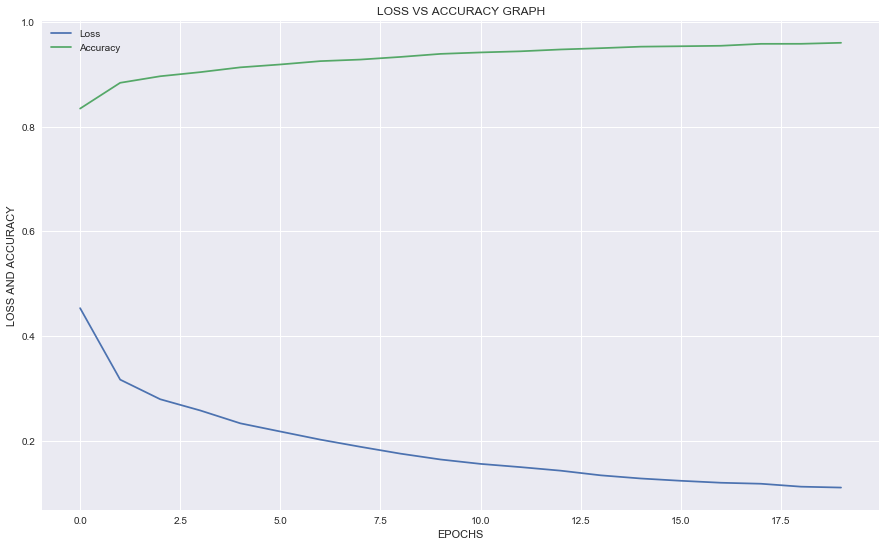

In [27]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (15,9))
ax.plot(trained_model.history["loss"])
ax.plot(trained_model.history["accuracy"])
ax.legend(["Loss", "Accuracy"])
ax.set(title = "LOSS VS ACCURACY GRAPH", xlabel = "EPOCHS", ylabel ="LOSS AND ACCURACY")
plt.show()

In [28]:
y_pred = model.predict_classes(x_test)

In [29]:
cf = classification_report(y_test , y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.86      0.86      1000
           3       0.90      0.93      0.92      1000
           4       0.87      0.88      0.87      1000
           5       0.97      0.98      0.98      1000
           6       0.77      0.71      0.74      1000
           7       0.96      0.95      0.96      1000
           8       0.96      0.99      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [31]:
cm = confusion_matrix(y_test, y_pred)

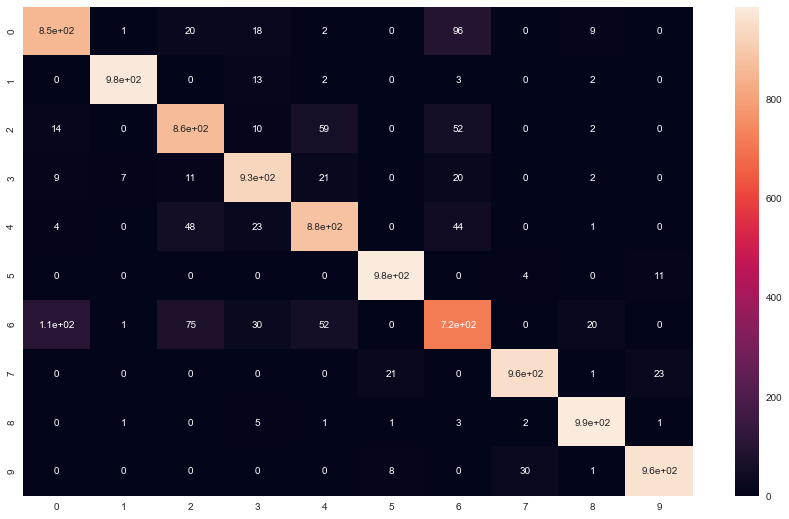

In [32]:
plt.figure(figsize = (15,9))
sns.heatmap(cm, annot = True)

10000/10000 [==============================] - 3s 328us/step
35.02500363826751


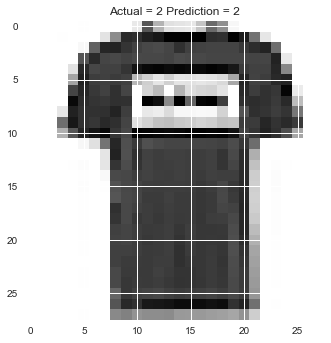

In [39]:
plt.imshow(x_train[1].reshape(x_train[1].shape[1], x_train[1].shape[1]))
plt.title("Actual = {} Prediction = {}".format(y_test[1], y_pred[1]))
plt.show()